In [1]:
import torch
from torchvision.models import resnet18
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision import datasets
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt

In [49]:
batch_size = 100  # 批次大小
train_loader = DataLoader(
    datasets.CIFAR10('/content/drive/My Drive/dataset/CIFAR10',  # Google Colabortary上的路径
                     train=True, download=False,
                     transform=transforms.Compose([
                         transforms.Resize((32, 32)),
                         transforms.ToTensor(),  # 转换为tensor
                         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                              std=[0.229, 0.224, 0.225])])),
    batch_size=batch_size, shuffle=True)

test_loader = DataLoader(
    datasets.CIFAR10('/content/drive/My Drive/dataset/CIFAR10',
                     train=False, download=False,
                     transform=transforms.Compose([
                         transforms.Resize((32, 32)),
                         transforms.ToTensor(),  # 转换为tensor
                         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                              std=[0.229, 0.224, 0.225])

                     ])),
    batch_size=batch_size, shuffle=True)

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = resnet18().to(device=device)  # 模型(torchvision提供)
criteon = nn.CrossEntropyLoss().to(device=device)  # 损失函数
optimizer = optim.Adam(net.parameters(), lr=1e-3)  # 优化器
epochs = 50

In [3]:
net  # resnet18的网络结构(layer1,layer2,layer3,layer4的残差模块均为2个)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [51]:
train_loss_list = list()  # 训练数据损失
test_acc_list = list()  # 测试数据精度
for epoch in range(epochs):
    net.train()
    for batch_index, (data, target) in enumerate(train_loader):
        data, target = data.to(device=device), target.to(device=device)
        res = net(data)
        loss = criteon(res, target)
        optimizer.zero_grad()  # 梯度清零
        loss.backward()  # 反向传播
        optimizer.step()  # 进行一次梯度更新
        if (batch_index + 1) % 400 == 0:
            print('loss: ', loss.item())
            train_loss_list.append(loss.item())

    # 每一个epoch纪录一次测试数据的精度
    total_correct = 0
    total_sum = 0
    for data, target in test_loader:
        net.eval()  # evaluation mode
        with torch.no_grad():  # 测试阶段不进行梯度运算(较为安全)
            data, target = data.to(device=device), target.to(device=device)
            result = net(data)
            predict = result.argmax(dim=1)
            correct = torch.eq(predict, target).float().sum().item()
            total_correct += correct
            total_sum += data.size(0)

    acc = total_correct / total_sum
    test_acc_list.append(acc)

loss:  7.326398849487305
loss:  1.1277990341186523
loss:  1.122463583946228
loss:  0.937479555606842
loss:  0.7138552665710449
loss:  0.6401174664497375
loss:  0.6008058786392212
loss:  0.5939030051231384
loss:  0.5914855599403381
loss:  0.6406217217445374
loss:  0.43475663661956787
loss:  0.4230025112628937
loss:  0.3632830083370209
loss:  0.2992096245288849
loss:  0.2770955562591553
loss:  0.284847617149353
loss:  0.36066940426826477
loss:  0.4078190326690674
loss:  0.14983758330345154
loss:  0.214823916554451
loss:  0.10132889449596405
loss:  0.21716494858264923
loss:  0.09464101493358612
loss:  0.168027862906456
loss:  0.14345136284828186
loss:  0.2005334496498108
loss:  0.020803818479180336
loss:  0.13691706955432892
loss:  0.11472544819116592
loss:  0.06960863620042801
loss:  0.04303496703505516
loss:  0.12232562154531479
loss:  0.033918000757694244
loss:  0.089718297123909
loss:  0.05398786440491676
loss:  0.05339651554822922
loss:  0.09445904940366745
loss:  0.15669701993465424

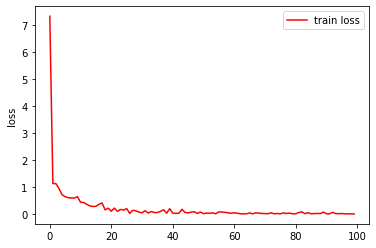

In [54]:
plt.plot(train_loss_list, color='r', label='train loss')
plt.legend()
plt.ylabel('loss')
plt.show()

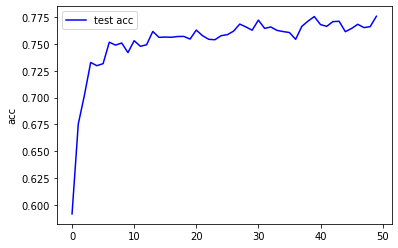

In [55]:
plt.plot(test_acc_list, color='b', label='test acc')
plt.legend()
plt.ylabel('acc')
plt.show()